# Leopard challenge Classification

## Загрузка данных
Данные беру из leopard-challenge-classification.zip
https://drive.google.com/file/d/1OYjGYeYQzKI3mE02ymtkrbRJb5EurpL7/view?usp=sharing

# Colab

In [1]:
! gdown --id 1OYjGYeYQzKI3mE02ymtkrbRJb5EurpL7

"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


! unzip /content/leopard-challenge-classification.zip -d /content/leopard-challenge-classification/

In [9]:
! unzip / content / leopard-challenge-classification.zip -d / content / leopard_challenge_classification /

"unzip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [32]:
import pandas as pd

In [1]:
df = pd.read_csv('/content/leopard_challenge_classification/train.csv')

NameError: name 'pd' is not defined

In [1]:
df.head()

NameError: name 'train' is not defined

In [ ]:
!pip install phik

!pip install feature_engine

!pip install catboost

# Pycharm

In [1]:
from zipfile import ZipFile

with ZipFile('leopard-challenge-classification.zip', 'r') as zf:
    zf.extractall()

# 1. Задача

Дан набор данных с основными клиническими показателями людей.
Каждая строчка в датасете - клинические показатели одного человека - рост, вес, зрение и т.д.
**Задача:** Определить, курит человек или нет, на основании его показателей.

# 2. Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import phik
import folium
from feature_engine.selection import SmartCorrelatedSelection
from feature_engine.imputation import RandomSampleImputer
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, log_loss
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool, cv
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings("ignore")
# plt.style.use('dark_background')
plt.style.use('seaborn-colorblind')
pd.set_option('display.max_columns', 100)

# 3. Загрузка Датасета

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,Y,0,N,0
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,Y,0,Y,0
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,Y,0,Y,0
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1


In [4]:
df.shape

(13863, 26)

In [5]:
df_test = pd.read_csv('test.csv')

In [6]:
df.head()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,Y,0,N,0
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,Y,0,Y,0
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,Y,0,Y,0
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1


In [7]:
df_test.shape

(5942, 25)

# 4. Получение информации о Датасете

## 4.1 Подготовка таблиц

### Перевод названий колонок в строчные буквы и замена пробелов

In [8]:
df.head()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,Y,0,N,0
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,Y,0,Y,0
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,Y,0,Y,0
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1


In [9]:
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '_').str.replace(')', '_').str.lower()
df_test.columns = df_test.columns.str.replace(' ', '_').str.replace('(', '_').str.replace(')', '_').str.lower()

## 4.2 Основная информация о датасете

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13863 entries, 0 to 13862
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   13863 non-null  int64  
 1   age                  13863 non-null  int64  
 2   height_cm_           13863 non-null  int64  
 3   weight_kg_           13863 non-null  int64  
 4   waist_cm_            13863 non-null  float64
 5   eyesight_left_       13863 non-null  float64
 6   eyesight_right_      13863 non-null  float64
 7   hearing_left_        13863 non-null  float64
 8   hearing_right_       13863 non-null  float64
 9   systolic             13863 non-null  float64
 10  relaxation           13863 non-null  float64
 11  fasting_blood_sugar  13863 non-null  float64
 12  cholesterol          13863 non-null  float64
 13  triglyceride         13863 non-null  float64
 14  hdl                  13863 non-null  float64
 15  ldl                  13863 non-null 

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5942 entries, 0 to 5941
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5942 non-null   int64  
 1   age                  5942 non-null   int64  
 2   height_cm_           5942 non-null   int64  
 3   weight_kg_           5942 non-null   int64  
 4   waist_cm_            5942 non-null   float64
 5   eyesight_left_       5942 non-null   float64
 6   eyesight_right_      5942 non-null   float64
 7   hearing_left_        5942 non-null   float64
 8   hearing_right_       5942 non-null   float64
 9   systolic             5942 non-null   float64
 10  relaxation           5942 non-null   float64
 11  fasting_blood_sugar  5942 non-null   float64
 12  cholesterol          5942 non-null   float64
 13  triglyceride         5942 non-null   float64
 14  hdl                  5942 non-null   float64
 15  ldl                  5942 non-null   f

## 4.3 Пропущенные значения

In [12]:
df.isna().mean().sort_values(ascending=False)

id                     0.0
age                    0.0
tartar                 0.0
dental_caries          0.0
oral                   0.0
gtp                    0.0
alt                    0.0
ast                    0.0
serum_creatinine       0.0
urine_protein          0.0
hemoglobin             0.0
ldl                    0.0
hdl                    0.0
triglyceride           0.0
cholesterol            0.0
fasting_blood_sugar    0.0
relaxation             0.0
systolic               0.0
hearing_right_         0.0
hearing_left_          0.0
eyesight_right_        0.0
eyesight_left_         0.0
waist_cm_              0.0
weight_kg_             0.0
height_cm_             0.0
smoking                0.0
dtype: float64

In [13]:
df_test.isna().mean().sort_values(ascending=False)

id                     0.0
triglyceride           0.0
dental_caries          0.0
oral                   0.0
gtp                    0.0
alt                    0.0
ast                    0.0
serum_creatinine       0.0
urine_protein          0.0
hemoglobin             0.0
ldl                    0.0
hdl                    0.0
cholesterol            0.0
age                    0.0
fasting_blood_sugar    0.0
relaxation             0.0
systolic               0.0
hearing_right_         0.0
hearing_left_          0.0
eyesight_right_        0.0
eyesight_left_         0.0
waist_cm_              0.0
weight_kg_             0.0
height_cm_             0.0
tartar                 0.0
dtype: float64

**Пропуски в данных отсутствуют!!**

## 4.4 Дубликаты

In [14]:
df.duplicated().sum()

0

In [15]:
df_test.duplicated().sum()

0

**Дубликаты отсутствуют!**

## 4.5 Числовые переменные

## 4.6 Категориальные переменные

# 5.EDA

## 5.1 Phik взаимосвязь

## 5.2 Корреляция признаков

## 5.3 Количественные признаки

#### Функция гистограммы и описания для количественных признаков

In [16]:
def hist_box_describe_num(ds, x):
    print(ds[x].describe())
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(data=ds, x=ds[x], kde=True);
    plt.subplot(1, 2, 2)
    sns.boxplot(data=ds, y=ds[x]);

## 5.4 Категориальные переменные

# 6. Preprocessing

## 6.1 Удаление выбросов

### Waist - окружность талии

У половины пациентов окружность талии составляет от 79 до 90 см
**Выбросы в сравнении с тестом:** 2 пациента > 121

In [17]:
df = df.query('waist_cm_ < 121')

### Systolic - систолическое давление

У половины пациентов систолическое давление находится в пределах от 115 до 131
**Выбросы в сравнении с тестом:** ВСЕГО 3 - 1 пациент > 200, 2 пациента < 85

In [18]:
df = df.query('systolic < 200 & systolic > 85')

У половины пациентов диастолическое давление находится в пределах от 70 до 83
**Выбросы в сравнении с тестом:** ВСЕГО 2 - 1 пациент > 133, 1 пациент < 45

In [19]:
df = df.query('relaxation < 135 & relaxation > 45')

### Fasting blood sugar - Сахар в крови

У половины пациентов сахар в крови находится в пределах от 90 до 104
**Выбросы в сравнении с тестом:** Всего 2 - 1 пациент > 400, 1 пациент < 50

In [20]:
df = df.query('fasting_blood_sugar < 400 & fasting_blood_sugar > 50')

### Cholesterol - холестерин

У половины пациентов холестерин находится в пределах от 169 до 216
**Выбросы в сравнении с тестом:** 2 пациента > 400,

In [21]:
df = df.query('cholesterol < 400')

### Triglyceride - триглицерид

У половины пациентов триглицерид находится в пределах от 78 до 166
**Выбросы в сравнении с тестом:** 6 пациентов < 20,

In [22]:
df = df.query('triglyceride > 20')

### HDL - холестерин липопротеинов высокой плотности

У половины пациентов холестерин липопротеинов находится в пределах от 45 до 61
**Выбросы в сравнении с тестом:** Всего 4 - 1 пациент > 160, 3 пациента < 20,

In [23]:
df = df.query('hdl < 160 & hdl > 20')

### LDL - липопротеины низкой плотности

У половины пациентов липопротеины находится в пределах от 91 до 135
**Выбросы в сравнении с тестом:** Всего 9 - 6 пациентов > 1100, 3 пациента < 10,

In [24]:
df = df.query('ldl < 1100 & ldl > 10')

### Hemoglobin - гемоглобин

У половины пациентов гемоглобин находится в пределах от 14.8 до 16.1
**Выбросы в сравнении с тестом:** Всего 9 - 3 пациента > 19.4, 6 пациентов < 8.6,

In [25]:
df = df.query('hemoglobin < 19.4 & hemoglobin > 8.6')

### Serum creatinine - Сывороточный креатинин

У половины пациентов сывороточный креатинин находится в пределах от 0.9 до 1.1
**Выбросы в сравнении с тестом:** 10 пациентов > 2.6

In [26]:
df = df.query('serum_creatinine < 2.6')

### AST - Аспартатаминотрансфераз

У половины пациентов Аспартатаминотрансфераз находится в пределах от 20 до 30
**Выбросы в сравнении с тестом:** Всего 4 - 3 пациента > 600, 1 пациент < 8

In [27]:
df = df.query('ast < 600 & ast > 8')

### ALT - Аланинаминотрансфераза

У половины пациентов Аланинаминотрансфераза находится в пределах от 18 до 35
**Выбросы в сравнении с тестом:** Всего 3 - 1 пациента > 1600, 2 пациента < 3

In [28]:
df = df.query('alt < 1600 & alt > 3')

### Итого:

Из обучающего выборки было дропнуто 54 переменные, что составляет 0.3% от обучающей выборки.

In [29]:
df.shape

(13809, 26)

In [30]:
ddddddddddddddddd

NameError: name 'ddddddddddddddddd' is not defined

## 6.2 Список всех фич

Сразу удаляю фичу oral, т.к. она не несёт полезной информации

In [ ]:
X = df.drop(['oral', 'smoking'], axis=1)
y = df.smoking
cat_features = ['tartar']
df_test = df_test.drop('oral', axis=1)

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
cat_features

# 7. Modeling

## Baseline catboost

### Обучающая и тестовая выборки

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=659)

### Составаляю список фичей
В baselin`е оставлю все фичи

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
cat_features

### Создание Pool`ов для модели

In [ ]:
train_data = Pool(X_train, y_train, cat_features=cat_features)
test_data = Pool(X_test, y_test, cat_features=cat_features)
full_data = Pool(X, y, cat_features=cat_features)

In [ ]:
ввввввввввввввввввввввввв

### Baseline model

### Настройка гиперпараметров

In [ ]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100}

In [ ]:
model = CatBoostClassifier(**parameters)

### Обучение модели

In [ ]:
model.fit(train_data, eval_set=test_data, plot=True)

### Feature importance

In [ ]:
base = model.get_feature_importance(prettified=True)

In [ ]:
base

### Прогнозирование

#### Скоры

In [ ]:
df_test.head()

Создаю колонку для baseline catboost скора

In [ ]:
df_test['baseline_cat_score'] = model.predict_proba(df_test)[:, 1]

In [ ]:
df_test.baseline_cat_score

Распределение вероятностей (Score) курит или не курит

In [ ]:
df_test.baseline_cat_score.hist();

#### Пороги

Посмотрю на пользователей вероятность курения которых > 0.5
Для вывода 0-ей и 1-иц нужно домножить на 1 иначе будет True и False

In [ ]:
((df_test.baseline_cat_score > 0.5) * 1).mean()

Такая же вероятность у метода predict, т.к. порог по умолчанию = 0.5

In [ ]:
model.predict(df_test).mean()

В обучающем ДФ процент курильщиков ≈20% что существенно выше, чем получилось в тестовом ≈5% при пороге 0.5. ПО этому есть смысл понижать порог, но в Baselin`е оставлю порог по умолчанию

In [ ]:
df.smoking.mean()

In [ ]:
df_test['baseline_cat_pred'] = (df_test.baseline_cat_score > 0.5) * 1

In [ ]:
df_test.head()

### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = df_test.baseline_cat_pred
submission.to_csv('Baseline_LR_0.47.csv', index=False)

In [ ]:
submission.head()

**Kaggle result:** 0.23 LR=auto, 0.3117 LR = 0.45

## Catboost V2 Thresholds

### Изменение порога

Изменю порог с 0.5 на 0.25

In [ ]:
((df_test.baseline_cat_score > 0.25) * 1).mean()

### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_score > 0.25) * 1
submission.to_csv('Baseline_threshold0.25_LR1.csv', index=False)

In [ ]:
submission.head()

**Kaggle result:** 0.4175 ↑ LR = 0.45

### Изменение порога

Изменю порог с 0.25 на 0.2

In [ ]:
((df_test.baseline_cat_score > 0.20) * 1).mean()

### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_score > 0.2) * 1
submission.to_csv('Baseline_threshold0.2_LR0.47.csv', index=False)

In [ ]:
submission.head()

**Kaggle result:** 0.42861 ↑↑↑ LR = 0.45

### Изменение порога

Изменю порог с 0.2 на 0.1

In [ ]:
((df_test.baseline_cat_score > 0.1) * 1).mean()

### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_score > 0.1) * 1
submission.to_csv('Baseline_threshold0.1.csv', index=False)

In [ ]:
submission.head()

**Kaggle result:** 0.40293 ↓ LR = 0.45

### Изменение порога

Изменю порог с 0.1 на 0.15

In [ ]:
((df_test.baseline_cat_score > 0.15) * 1).mean()

### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_score > 0.15) * 1
submission.to_csv('Baseline_threshold0.15.csv', index=False)

In [ ]:
submission.head()

**Kaggle result:** 0.4259 ↑ LR = 0.45

### Итого

Наилучший порог для Baseline ≈ 0.2, F1 = 0.4286

## Catboost CV

In [ ]:
parameters = {'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'iterations': 1000}

In [ ]:
%%time
cv_data = cv(
    params=parameters,
    pool=full_data,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    stratified=False,
    verbose=500,
    plot=True
)

In [ ]:
best_value = np.max(cv_data['test-F1-mean'])
best_iter = np.argmax(cv_data['test-F1-mean'])

In [ ]:
best_iter, best_value

### Best iteration

In [ ]:
parameters = {'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'iterations': best_iter,
              'verbose': 100}

In [ ]:
model = CatBoostClassifier(**parameters)

In [ ]:
model.fit(full_data, plot=True)

### Feature importance

In [ ]:
base_cv = model.get_feature_importance(prettified=True)

In [ ]:
base_cv

In [ ]:
model.get_params()

### Прогноз

Создаю колонку для baseline catboost скора

In [ ]:
df_test['baseline_cat_cv_score'] = model.predict_proba(df_test)[:, 1]

In [ ]:
df_test.baseline_cat_cv_score

In [ ]:
df_test.baseline_cat_cv_score.hist();

Средний процент курильщиков в тесте ≈19.3%

In [ ]:
df_test.baseline_cat_cv_score.mean()

По порогу 0.5 вероятность ≈3.3%, что сильно меньше чем 20% в обучающей выборке. Есть смысл снижать порог.

In [ ]:
((df_test.baseline_cat_cv_score > 0.5) * 1).mean()

In [ ]:
model.predict(df_test).mean()

In [ ]:
(df_test.baseline_cat_cv_score > 0.5) * 1

In [ ]:
df_test['baseline_cat_cv_pred'] = (df_test.baseline_cat_cv_score > 0.5) * 1

In [ ]:
df_test.head()

### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = df_test.baseline_cat_cv_pred
submission.to_csv('Cat_CV_LR_auto_THRS_0.5.csv', index=False)

In [ ]:
submission.head()

**Kaggle result:** 0.16893 ↓ LR=auto, хуже чем Baseline (0.23)

#### Изменяю порог до 0.2

По порогу 0.2 процент курильщиков ≈37.4, что выше чем в обучающей выборке

In [ ]:
((df_test.baseline_cat_cv_score > 0.2) * 1).mean()

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_cv_score > 0.2) * 1
submission.to_csv('Cat_CV_THRS02_LR_auto.csv', index=False)

In [ ]:
submission.head()

**Kaggle result:** 0.43257 ↑ LR = auto - лучше, чем Baseline THRS 0.2

#### Изменяю порог до 0.19

In [ ]:
((df_test.baseline_cat_cv_score > 0.19) * 1).mean()

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_cv_score > 0.19) * 1
submission.to_csv('Cat_CV_THRS0.19_LR_auto.csv', index=False)

In [ ]:
submission.head()

**Kaggle result:** 0.43509 ↑ LR = auto - лучше, чем CV THRS 0.2

#### Изменяю порог до 0.18

In [ ]:
((df_test.baseline_cat_cv_score > 0.18) * 1).mean()

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_cv_score > 0.18) * 1
submission.to_csv('Cat_CV_THRS0.18_LR_auto.csv', index=False)

In [ ]:
submission.head()

**Kaggle result:** 0.43323 ↑ LR = auto - хужу, чем CV THRS 0.19

## Grid Search

In [ ]:
pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
model = CatBoostClassifier(iterations=1000, eval_metric='F1', verbose = 350, random_state=659)
grid = {'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]}

In [ ]:
%%time
model.grid_search(grid, pool, plot=True)

In [ ]:
model.get_params()

Best F1 = 0.3484, Best LR = 0.75

In [ ]:
pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
model = CatBoostClassifier(iterations=1000, eval_metric='F1', verbose = 350, random_state=659)
grid = {'learning_rate': [0.51, 0.53, 0.55, 0.57, 0.59, 0.61, 0.63, 0.65, 0.67, 0.69, 0.71, 0.73, 0.75, 0.77, 0.79, 0.81, 0.83, 0.85]}

In [ ]:
%%time
model.grid_search(grid, pool, plot=True)

In [ ]:
model.get_params()

Best F1 = 0.3484, Best LR = 0.75

#### Итого

Лучший Learning rate ≈ 0.75
F1 ≈ 0.3484

## Catboost model comparison

In [ ]:
%%time
model1 = CatBoostClassifier(
    learning_rate=0.05,
    iterations=1000,
    random_state=659,
    train_dir='learning_rate_0.05',
    custom_metric=['F1', 'AUC']
)

model2 = CatBoostClassifier(
    learning_rate=0.15,
    iterations=1000,
    random_state=659,
    train_dir='learning_rate_0.15',
    custom_metric=['F1', 'AUC']
)

model3 = CatBoostClassifier(
    learning_rate=0.25,
    iterations=1000,
    random_state=659,
    train_dir='learning_rate_0.25',
    custom_metric=['F1', 'AUC']
)

model4 = CatBoostClassifier(
    learning_rate=0.35,
    iterations=1000,
    random_state=659,
    train_dir='learning_rate_0.35',
    custom_metric=['F1', 'AUC']
)

model5 = CatBoostClassifier(
    learning_rate=0.47,
    iterations=1000,
    random_state=659,
    train_dir='learning_rate_0.47',
    custom_metric=['F1', 'AUC']
)

model6 = CatBoostClassifier(
    learning_rate=0.55,
    iterations=1000,
    random_state=659,
    train_dir='learning_rate_0.55',
    custom_metric=['F1', 'AUC']
)

model7 = CatBoostClassifier(
    learning_rate=0.65,
    iterations=1000,
    random_state=659,
    train_dir='learning_rate_0.65',
    custom_metric=['F1', 'AUC']
)

model8 = CatBoostClassifier(
    learning_rate=0.75,
    iterations=1000,
    random_state=659,
    train_dir='learning_rate_0.75',
    custom_metric=['F1', 'AUC']
)

model9 = CatBoostClassifier(
    learning_rate=0.85,
    iterations=1000,
    random_state=659,
    train_dir='learning_rate_0.85',
    custom_metric=['F1', 'AUC']
)

model10 = CatBoostClassifier(
    learning_rate=0.95,
    iterations=1000,
    random_state=659,
    train_dir='learning_rate_0.95',
    custom_metric=['F1', 'AUC']
)
model1.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model2.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model3.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model4.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model5.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model6.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model7.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model8.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model9.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model10.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)

In [ ]:
%%time
from catboost import MetricVisualizer

MetricVisualizer(['learning_rate_0.05', 'learning_rate_0.15', 'learning_rate_0.25', 'learning_rate_0.35', 'learning_rate_0.47', 'learning_rate_0.55', 'learning_rate_0.65', 'learning_rate_0.75', 'learning_rate_0.85', 'learning_rate_0.95']).start()

Best F`s: F1 = 0.3434 LR = 0.65, F1 = 0.3318 LR = 0.75, F1 = 0.3452 LR = 0.95???

In [ ]:
%%time
model1 = CatBoostClassifier(
    learning_rate=0.57,
    iterations=1000,
    random_state=659,
    train_dir='learning_rate_0.57',
    custom_metric=['F1', 'AUC']
)

model2 = CatBoostClassifier(
    learning_rate=0.59,
    iterations=1000,
    random_state=659,
    train_dir='learning_rate_0.59',
    custom_metric=['F1', 'AUC']
)

model3 = CatBoostClassifier(
    learning_rate=0.61,
    iterations=1000,
    random_state=659,
    train_dir='learning_rate_0.61',
    custom_metric=['F1', 'AUC']
)

model4 = CatBoostClassifier(
    learning_rate=0.63,
    iterations=1000,
    random_state=659,
    train_dir='learning_rate_0.63',
    custom_metric=['F1', 'AUC']
)

model5 = CatBoostClassifier(
    learning_rate=0.67,
    iterations=1000,
    random_state=659,
    train_dir='learning_rate_0.67',
    custom_metric=['F1', 'AUC']
)

model6 = CatBoostClassifier(
    learning_rate=0.69,
    iterations=1000,
    random_state=659,
    train_dir='learning_rate_0.69',
    custom_metric=['F1', 'AUC']
)

model7 = CatBoostClassifier(
    learning_rate=0.65,
    iterations=1000,
    random_state=659,
    train_dir='learning_rate_0.65',
    custom_metric=['F1', 'AUC']
)

model8 = CatBoostClassifier(
    learning_rate=0.71,
    iterations=1000,
    random_state=659,
    train_dir='learning_rate_0.71',
    custom_metric=['F1', 'AUC']
)

model9 = CatBoostClassifier(
    learning_rate=0.73,
    iterations=1000,
    random_state=659,
    train_dir='learning_rate_0.73',
    custom_metric=['F1', 'AUC']
)

model10 = CatBoostClassifier(
    learning_rate=0.75,
    iterations=1000,
    random_state=659,
    train_dir='learning_rate_0.75',
    custom_metric=['F1', 'AUC']
)

model11 = CatBoostClassifier(
    learning_rate=0.77,
    iterations=1000,
    random_state=659,
    train_dir='learning_rate_0.77',
    custom_metric=['F1', 'AUC']
)

model12 = CatBoostClassifier(
    learning_rate=0.79,
    iterations=1000,
    random_state=659,
    train_dir='learning_rate_0.79',
    custom_metric=['F1', 'AUC']
)
model13 = CatBoostClassifier(
    learning_rate=0.81,
    iterations=1000,
    random_state=659,
    train_dir='learning_rate_0.81',
    custom_metric=['F1', 'AUC']
)

model14 = CatBoostClassifier(
    learning_rate=0.83,
    iterations=1000,
    random_state=659,
    train_dir='learning_rate_0.83',
    custom_metric=['F1', 'AUC']
)

model15 = CatBoostClassifier(
    learning_rate=0.85,
    iterations=1000,
    random_state=659,
    train_dir='learning_rate_0.85',
    custom_metric=['F1', 'AUC']
)
model1.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model2.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model3.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model4.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model5.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model6.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model7.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model8.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model9.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model10.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model11.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model12.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model13.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model14.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model15.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)

In [ ]:
%%time
from catboost import MetricVisualizer

MetricVisualizer(['learning_rate_0.57', 'learning_rate_0.59', 'learning_rate_0.61', 'learning_rate_0.63', 'learning_rate_0.65', 'learning_rate_0.67', 'learning_rate_0.69', 'learning_rate_0.71', 'learning_rate_0.73', 'learning_rate_0.75', 'learning_rate_0.77', 'learning_rate_0.79', 'learning_rate_0.81', 'learning_rate_0.83', 'learning_rate_0.85']).start()

Best F`s: F1 = 0.3470 LR = 0.77,  F1 = 0.3470 LR = 0.69, F1 = 0.3434 LR = 0.65

In [ ]:
model.get_feature_importance(prettified=True)

#### Итого
Лучший Learning rate ≈ 0.77
F1 ≈ 0.3470

## Catboost CV Grid search & model comparison

In [ ]:
parameters = {'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'learning_rate': 0.75,
              'random_state': 659,
              'iterations': 1000}

In [ ]:
%%time
cv_data = cv(
    params=parameters,
    pool=full_data,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    stratified=False,
    verbose=500,
    plot=True
)

In [ ]:
best_value = np.max(cv_data['test-F1-mean'])
best_iter = np.argmax(cv_data['test-F1-mean'])

In [ ]:
best_iter, best_value

### Feature importance

In [ ]:
model.get_feature_importance(prettified=True)

### Best iteration

In [ ]:
parameters = {'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'learning_rate': 0.75,
              'random_seed': 659,
              'iterations': best_iter,
              'verbose': 100}

In [ ]:
model = CatBoostClassifier(**parameters)

In [ ]:
model.fit(full_data, plot=True)

In [ ]:
model.get_params()

### Прогноз

Создаю колонку для baseline catboost скора

In [ ]:
df_test['cat_cv_gs_score'] = model.predict_proba(df_test)[:, 1]

In [ ]:
df_test.cat_cv_gs_score

In [ ]:
df_test.cat_cv_gs_score.hist();

В данном прогнозе модели курит ≈14.4% людей, что ниже, чем в обучающей выборке (≈20%)

In [ ]:
df_test.cat_cv_gs_score.mean()

По порогу 0.5 - 11.2%

In [ ]:
((df_test.cat_cv_gs_score > 0.5) * 1).mean()

In [ ]:
model.predict(df_test).mean()

In [ ]:
df_test['cat_cv_gs_pred'] = (df_test.cat_cv_gs_score > 0.5) * 1

In [ ]:
df_test.head()

### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = df_test.cat_cv_gs_pred
submission.to_csv('Cat_CV_LR_0.75_THRS_0.5.csv', index=False)

In [ ]:
submission.head()

**Kaggle result:** 0.3165 ↓ LR=0.75, лучше чем Baseline (0.23) и CV (0.16), но хуже CV THRSH (0.43)

#### Изменяю порог до 0.2

По порогу 0.2 процент курильщиков ≈20, что примерно равно количеству в обучающей выборке

In [ ]:
((df_test.cat_cv_gs_score > 0.2) * 1).mean()

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.cat_cv_gs_score > 0.2) * 1
submission.to_csv('Cat_CV_THRS02_LR_0.75.csv', index=False)

In [ ]:
submission.head()

**Kaggle result:** 0.381 ↑ LR = 0.75- лучше, чем CV THRSH=0.5 (0.31), но хуже CV THRSH=0.2,LR=auto (0.4350)

#### Изменяю порог до 0.1

По порогу 0.1 процент курильщиков ≈28%, что больше, чем в обучающей выборке

In [ ]:
((df_test.cat_cv_gs_score > 0.1) * 1).mean()

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.cat_cv_gs_score > 0.1) * 1
submission.to_csv('Cat_CV_THRS01_LR_0.75.csv', index=False)

In [ ]:
submission.head()

**Kaggle result:** 0.397 ↑ LR = 0.75- лучше, чем CV THRSH=0.2 (0.381), но хуже CV THRSH=0.19,LR=auto (0.4350)

#### Изменяю порог до 0.04

По порогу 0.04 процент курильщиков ≈39.4%, что больше, чем в обучающей выборке

In [ ]:
((df_test.cat_cv_gs_score > 0.04) * 1).mean()

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.cat_cv_gs_score > 0.04) * 1
submission.to_csv('Cat_CV_THRS004_LR_0.75.csv', index=False)

In [ ]:
submission.head()

**Kaggle result:** 0.4005 ↑ LR = 0.75- лучше, чем CV THRSH=0.1 (0.397), но хуже CV THRSH=0.19,LR=auto (0.4350)

#### Изменяю порог до 0.025

По порогу 0.025 процент курильщиков ≈46.3%, что больше, чем в обучающей выборке

In [ ]:
((df_test.cat_cv_gs_score > 0.025) * 1).mean()

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.cat_cv_gs_score > 0.025) * 1
submission.to_csv('Cat_CV_THRS0025_LR_0.75.csv', index=False)

In [ ]:
submission.head()

**Kaggle result:** 0.397 ↑ LR = 0.75- хуже, чем CV THRSH=0.04 (0.4005) и хуже CV THRSH=0.19,LR=auto (0.4350)

## Baseline + ACW

In [ ]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced'}

In [ ]:
model = CatBoostClassifier(**parameters)

In [ ]:
model.fit(train_data, eval_set=test_data, plot=True)

### Feature importance

In [ ]:
acw = model.get_feature_importance(prettified=True)

In [ ]:
acw

In [ ]:
df_test['baseline_cat_score_acw'] = model.predict_proba(df_test)[:, 1]

In [ ]:
df_test.baseline_cat_score_acw

In [ ]:
df_test.baseline_cat_score_acw.hist();

In [ ]:
((df_test.baseline_cat_score_acw > 0.5) * 1).mean()

In [ ]:
model.predict(df_test).mean()

In [ ]:
df_test['baseline_cat_pred_acw'] = (df_test.baseline_cat_score_acw > 0.5) * 1

In [ ]:
df_test.head()

### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = df_test.baseline_cat_pred_acw
submission.to_csv('Baseline_ACW_LR_auto.csv', index=False)

In [ ]:
submission['smoking'].mean()

**Kaggle result:** 0.43467 LR=auto + ACW

### Изменение порога

In [ ]:
((df_test.baseline_cat_score_acw > 0.53) * 1).mean()

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_score_acw > 0.53) * 1
submission.to_csv('Baseline_ACW_threshold0.53_LRauto.csv', index=False)

In [ ]:
submission.head()

In [ ]:
submission['smoking'].mean()

**Kaggle result:** 0.41734 ↓ LR = 0.057 auto,

### Grid Search

In [ ]:
pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
model = CatBoostClassifier(iterations=1000, eval_metric='F1', verbose = 350,  auto_class_weights='Balanced', random_state=659)
grid = {'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]}

In [ ]:
%%time
model.grid_search(grid, pool, plot=True)

In [ ]:
model.get_params()

In [ ]:
%%time
model1 = CatBoostClassifier(
    learning_rate=0.65,
    iterations=1000,
    random_state=659,
    train_dir='learning_rate_0.65',
    custom_metric=['F1', 'AUC'],
    auto_class_weights='Balanced'
)

model2 = CatBoostClassifier(
    learning_rate=0.5,
    iterations=1000,
    random_state=659,
    train_dir='learning_rate_0.5',
    custom_metric=['F1', 'AUC'],
    auto_class_weights='Balanced'
)

model3 = CatBoostClassifier(
    learning_rate=0.05,
    iterations=1000,
    random_state=659,
    train_dir='learning_rate_0.05',
    custom_metric=['F1', 'AUC'],
    auto_class_weights='Balanced'
)

model1.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model2.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model3.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)

In [ ]:
%%time
from catboost import MetricVisualizer

MetricVisualizer(['learning_rate_0.05', 'learning_rate_0.5', 'learning_rate_0.65']).start()

## Catboost CV + ACW

In [ ]:
parameters = {'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'iterations': 1000,
              'auto_class_weights': 'Balanced'}

In [ ]:
%%time
cv_data = cv(
    params=parameters,
    pool=full_data,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    stratified=False,
    verbose=500,
    plot=True
)

In [ ]:
best_value = np.max(cv_data['test-F1-mean'])
best_iter = np.argmax(cv_data['test-F1-mean'])

In [ ]:
best_iter, best_value

### Feature importance

In [ ]:
model.get_feature_importance(prettified=True)

### Best iteration

In [ ]:
parameters = {'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'iterations': best_iter,
              'verbose': 100,
              'auto_class_weights': 'Balanced'}

In [ ]:
model = CatBoostClassifier(**parameters)

In [ ]:
model.fit(full_data, plot=True)

In [ ]:
model.get_params()

In [ ]:
model.get_feature_importance(prettified=True)

### Прогноз

Создаю колонку для baseline catboost скора

In [ ]:
df_test['cat_cv_acw_score'] = model.predict_proba(df_test)[:, 1]

In [ ]:
df_test.cat_cv_acw_score

In [ ]:
df_test.cat_cv_acw_score.hist();

Средний процент курильщиков в тесте ≈39.8%, что выше, чем в обучающей выборке

In [ ]:
df_test.cat_cv_acw_score.mean()

По порогу 0.5 вероятность ≈3.6%, что сильно меньше чем 20% в обучающей выборке. Есть смысл снижать порог.

In [ ]:
((df_test.cat_cv_acw_score > 0.5) * 1).mean()

In [ ]:
model.predict(df_test).mean()

In [ ]:
df_test['cat_cv_pred_acw'] = (df_test.cat_cv_acw_score > 0.5) * 1

In [ ]:
df_test.head()

### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = df_test.cat_cv_pred_acw
submission.to_csv('Cat_CV_ACW_LR_auto_THRS_0.5.csv', index=False)

In [ ]:
submission.head()

**Kaggle result:** 0.42341 ↓ LR=auto, хуже чем Baseline + ACW (0.43467)

#### Изменяю порог до 0.2

По порогу 0.2 процент курильщиков ≈37.4, что выше чем в обучающей выборке

In [ ]:
((df_test.cat_cv_acw_score > 0.45) * 1).mean()

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.cat_cv_acw_score > 0.45) * 1
submission.to_csv('Cat_CV_THRS045_LR_auto.csv', index=False)

In [ ]:
submission.head()

**Kaggle result:** 0.42051 ↓ LR = auto - хуже, чем Baseline + ACW

## Catboost CV drop features

Создам новый ДФ для feature engineering

In [31]:
df_copy = df.copy()
df_test_copy = df_test.copy()

In [ ]:
df.head()

Посмотрю Feature importance у разных моделей:
1. Baseline
2. CV
3. Baseline + ACW

In [ ]:
base

In [ ]:
base_cv

In [ ]:
acw

Дропну фичи которые не влияют или практически не влияют на модель

In [32]:
X = df.drop(['hearing_left_', 'hearing_right_', 'id', 'urine_protein', 'eyesight_left_', 'eyesight_right_', 'height_cm_', 'dental_caries', 'smoking', 'oral'], axis=1)
y = df.smoking
cat_features = ['tartar']
df_test_copy = df_test_copy.drop(['hearing_left_', 'hearing_right_', 'id', 'urine_protein', 'eyesight_left_', 'eyesight_right_', 'height_cm_', 'dental_caries', 'oral'], axis=1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=659)

In [34]:
train_data = Pool(X_train, y_train, cat_features=cat_features)
test_data = Pool(X_test, y_test, cat_features=cat_features)
full_data = Pool(X, y, cat_features=cat_features)

### Baseline model

### Настройка гиперпараметров

In [35]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100}

In [36]:
model = CatBoostClassifier(**parameters)

In [37]:
model.fit(train_data, eval_set=test_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.057358
0:	learn: 0.0106336	test: 0.0000000	best: 0.0000000 (0)	total: 151ms	remaining: 2m 30s
100:	learn: 0.1373355	test: 0.0913706	best: 0.0913706 (99)	total: 1.05s	remaining: 9.33s
200:	learn: 0.2562929	test: 0.1533546	best: 0.1570513 (193)	total: 1.79s	remaining: 7.13s
300:	learn: 0.3506869	test: 0.1593750	best: 0.1710731 (295)	total: 2.53s	remaining: 5.88s
400:	learn: 0.4291135	test: 0.1843318	best: 0.1871166 (398)	total: 3.29s	remaining: 4.91s
500:	learn: 0.4879840	test: 0.1957831	best: 0.1987768 (421)	total: 4.06s	remaining: 4.04s
600:	learn: 0.5458642	test: 0.2065868	best: 0.2068966 (580)	total: 4.79s	remaining: 3.18s
700:	learn: 0.5922693	test: 0.2170088	best: 0.2176471 (690)	total: 5.54s	remaining: 2.36s
800:	learn: 0.6297872	test: 0.2318841	best: 0.2322206 (773)	total: 6.3s	remaining: 1.57s
900:	learn: 0.6692240	test: 0.2413793	best: 0.2424242 (856)	total: 7.07s	remaining: 777ms
999:	learn: 0.6973380	test: 0.2378223	best: 0.2478632 (915)	total: 7.82s	re

In [38]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,gtp,9.822146
1,triglyceride,9.593389
2,age,7.495763
3,waist_cm_,7.416420
4,alt,7.315613
5,hemoglobin,7.200620
6,ldl,7.052737
7,cholesterol,6.600658
8,fasting_blood_sugar,6.364575
9,systolic,5.961822


Создаю колонку для baseline catboost скора

In [40]:
df_test_copy['cat_score_drop1'] = model.predict_proba(df_test_copy)[:, 1]

In [41]:
df_test_copy.cat_score_drop1

0       0.283389
1       0.003200
2       0.086899
3       0.086367
4       0.154906
          ...   
5937    0.146306
5938    0.112120
5939    0.064106
5940    0.142221
5941    0.222115
Name: cat_score_drop1, Length: 5942, dtype: float64

#### Пороги

In [42]:
((df_test_copy.cat_score_drop1 > 0.5) * 1).mean()

0.05301245371928644

In [43]:
model.predict(df_test_copy).mean()

0.05301245371928644

In [44]:
df_test_copy['cat_pred_drop1'] = (df_test_copy.cat_score_drop1 > 0.5) * 1

In [45]:
df_test_copy.head()

,age,weight_kg_,waist_cm_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,serum_creatinine,ast,alt,gtp,tartar,cat_score_drop1,cat_pred_drop1
0,40,75,87.0,140.0,90.0,131.0,225.0,216.0,52.0,129.0,16.4,1.1,25.0,58.0,43.0,Y,0.283389,0
1,25,65,78.4,118.0,78.0,101.0,170.0,33.0,72.0,91.0,11.9,0.9,33.0,66.0,22.0,N,0.003200,0
2,50,105,109.3,130.0,90.0,96.0,162.0,144.0,71.0,62.0,15.4,0.9,19.0,24.0,32.0,Y,0.086899,0
3,60,60,81.0,118.0,76.0,97.0,172.0,91.0,46.0,108.0,16.2,1.2,34.0,37.0,26.0,Y,0.086367,0
4,45,70,83.0,130.0,80.0,100.0,191.0,365.0,34.0,84.0,15.2,0.7,27.0,25.0,26.0,N,0.154906,0


### Сохранение результатов

In [46]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = df_test_copy['cat_pred_drop1']
submission.to_csv('Cat_LR_auto_drop1.csv', index=False)

In [47]:
submission.head()

,id,smoking
0,19200,0
1,7784,0
2,11682,0
3,9949,0
4,9378,0


**Kaggle result:** 0.2297 LR=auto

Изменю порог на 0.2

In [62]:
((df_test_copy.cat_score_drop1 > 0.20) * 1).mean()

0.3419723998653652

### Сохранение результатов

In [63]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test_copy.cat_score_drop1 > 0.20) * 1
submission.to_csv('Cat_LR_auto_THRSH_02_drop1.csv', index=False)

In [64]:
submission.head()

,id,smoking
0,19200,1
1,7784,0
2,11682,0
3,9949,0
4,9378,0


**Kaggle result:** 0.43254 ↑↑↑

Изменю порог на 0.175

In [67]:
((df_test_copy.cat_score_drop1 > 0.175) * 1).mean()

0.4000336587007742

### Сохранение результатов

In [68]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test_copy.cat_score_drop1 > 0.175) * 1
submission.to_csv('Cat_LR_auto_THRSH_0175_drop1.csv', index=False)

In [69]:
submission.head()

,id,smoking
0,19200,1
1,7784,0
2,11682,0
3,9949,0
4,9378,0


**Kaggle result:** 0.42996 ↓

### Baseline + ACW

In [70]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced'}

In [71]:
model = CatBoostClassifier(**parameters)

In [72]:
model.fit(train_data, eval_set=test_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.057358
0:	learn: 0.5573270	test: 0.5268990	best: 0.5268990 (0)	total: 8.85ms	remaining: 8.84s
100:	learn: 0.6950685	test: 0.6159664	best: 0.6199543 (81)	total: 797ms	remaining: 7.1s
200:	learn: 0.7373025	test: 0.6109041	best: 0.6213382 (173)	total: 1.6s	remaining: 6.34s
300:	learn: 0.7934771	test: 0.5961230	best: 0.6213382 (173)	total: 2.39s	remaining: 5.55s
400:	learn: 0.8337373	test: 0.5973695	best: 0.6213382 (173)	total: 3.2s	remaining: 4.78s
500:	learn: 0.8641488	test: 0.5923690	best: 0.6213382 (173)	total: 3.98s	remaining: 3.96s
600:	learn: 0.8895608	test: 0.5862766	best: 0.6213382 (173)	total: 4.74s	remaining: 3.15s
700:	learn: 0.9099351	test: 0.5805892	best: 0.6213382 (173)	total: 5.52s	remaining: 2.35s
800:	learn: 0.9248023	test: 0.5695163	best: 0.6213382 (173)	total: 6.33s	remaining: 1.57s
900:	learn: 0.9393582	test: 0.5700470	best: 0.6213382 (173)	total: 7.15s	remaining: 785ms
999:	learn: 0.9481947	test: 0.5626597	best: 0.6213382 (173)	total: 7.92s	rema

### Feature importance

In [74]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,gtp,14.847841
1,age,13.469570
2,triglyceride,9.389170
3,alt,7.828248
4,hemoglobin,7.141270
5,waist_cm_,6.238297
6,ldl,5.911721
7,serum_creatinine,4.949016
8,hdl,4.698051
9,tartar,4.404200


In [75]:
df_test_copy['cat_score_acw_drop1'] = model.predict_proba(df_test_copy)[:, 1]

In [77]:
df_test_copy.cat_score_acw_drop1

0       0.579439
1       0.118867
2       0.478128
3       0.264404
4       0.490135
          ...   
5937    0.338735
5938    0.367915
5939    0.272691
5940    0.400105
5941    0.528485
Name: cat_score_acw_drop1, Length: 5942, dtype: float64

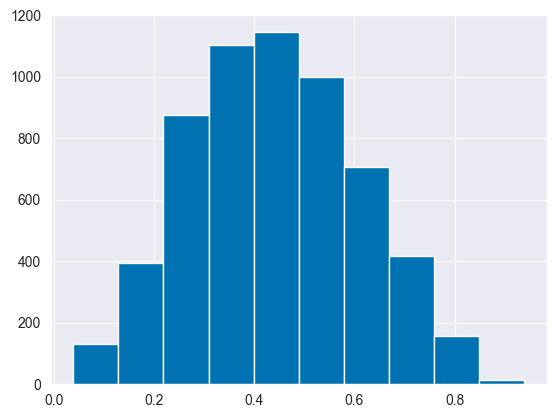

In [79]:
df_test_copy.cat_score_acw_drop1.hist();

In [81]:
((df_test_copy.cat_score_acw_drop1 > 0.5) * 1).mean()

0.36368226186469205

In [83]:
model.predict(df_test_copy).mean()

0.36368226186469205

In [84]:
df_test['cat_pred_acw_drop1'] = (df_test_copy.cat_score_acw_drop1 > 0.5) * 1

In [85]:
df_test.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,oral,dental_caries,tartar,cat_pred_acw_drop1
0,19200,40,170,75,87.0,1.2,1.0,1.0,1.0,140.0,90.0,131.0,225.0,216.0,52.0,129.0,16.4,1.0,1.1,25.0,58.0,43.0,Y,0,Y,1
1,7784,25,170,65,78.4,0.9,0.9,1.0,1.0,118.0,78.0,101.0,170.0,33.0,72.0,91.0,11.9,1.0,0.9,33.0,66.0,22.0,Y,0,N,0
2,11682,50,180,105,109.3,0.9,1.0,1.0,1.0,130.0,90.0,96.0,162.0,144.0,71.0,62.0,15.4,1.0,0.9,19.0,24.0,32.0,Y,0,Y,0
3,9949,60,160,60,81.0,0.5,0.5,1.0,1.0,118.0,76.0,97.0,172.0,91.0,46.0,108.0,16.2,1.0,1.2,34.0,37.0,26.0,Y,0,Y,0
4,9378,45,175,70,83.0,0.9,1.0,1.0,1.0,130.0,80.0,100.0,191.0,365.0,34.0,84.0,15.2,1.0,0.7,27.0,25.0,26.0,Y,0,N,0


### Сохранение результатов

In [102]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = df_test['cat_pred_acw_drop1']
submission.to_csv('Cat+ACW_LR_auto_THRSH_05_drop1.csv', index=False)

In [103]:
submission['smoking'].mean()

0.36368226186469205

**Kaggle result:** 0.43467 LR=auto + ACW

### Изменение порога на 0.49

In [119]:
((df_test_copy.cat_score_acw_drop1 > 0.494) * 1).mean()

0.3771457421743521

In [120]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test_copy.cat_score_acw_drop1 > 0.494) * 1
submission.to_csv('Cat+ACW_LR_auto_THRSH_0494_drop1.csv', index=False)

In [121]:
submission['smoking'].mean()

0.3771457421743521

In [122]:
submission.head()

,id,smoking
0,19200,1
1,7784,0
2,11682,0
3,9949,0
4,9378,0


**Kaggle result:** 0.41734 ↓ LR = 0.057 auto,